# <h3><b>KNN</b></h3>

In [12]:
import numpy as np
import pandas as pd
from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

<h4> <b>Import Dataset</b></h4>

In [13]:
#Reading the dataset
df= pd.read_csv('/content/sample_data/MLModels.csv')
df.head(5)

,Enrollment_ID,Access,Discussion,Navigate,Page Close,Problems,Video,Session,Wiki,Total_Time,Result
0,1,178.0,0.0,0.0,0.0,148.0,47.0,15,0.0,425.933333,0
1,4,162.0,0.0,0.0,0.0,23.0,14.0,12,0.0,261.616667,0
2,9,84.0,0.0,0.0,0.0,8.0,3.0,7,0.0,340.000000,1
3,12,72.0,0.0,0.0,0.0,0.0,51.0,10,0.0,297.500000,0
4,14,112.0,0.0,0.0,0.0,32.0,10.0,9,0.0,368.800000,1


<h4><b>Data Preprocessing</b></h4>

In [14]:
#Splitting into X(Features) and Y(Label)
X = df.loc[:,['Enrollment_ID', 'Access', 'Discussion', 'Navigate', 'Page Close',
       'Problems', 'Video', 'Session', 'Wiki', 'Total_Time']] 

In [15]:
Y = df['Result']

In [16]:
#Splitting into Train and Test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6982, 10)
(1746, 10)
(6982,)
(1746,)


In [17]:
# Data Normalisation
X_train = X_train / 255
X_test = X_test / 255

<h4> <b> Model Implementation</b></h4>

In [18]:
#Model Implementation
KNeighbors_model = KNeighborsClassifier(n_neighbors=3)
KNeighbors_model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

<h4><b> Results</b></h4>

In [19]:
# Model Prediction
y_prediction = KNeighbors_model.predict(X_test)
print (f'Train Accuracy - : {KNeighbors_model.score(X_train,Y_train):.3f}')
print (f'Test Accuracy  - : {KNeighbors_model.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.859
Test Accuracy  - : 0.775


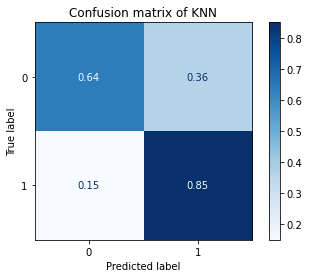

In [20]:
# Confusion Matrix
matrix = plot_confusion_matrix(KNeighbors_model, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix of KNN')
plt.show(matrix)

In [21]:
# Calculation of Accuracy, Precision and Recall
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(Y_test, y_prediction)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(Y_test, y_prediction, average='weighted')))
print("Recall: "+ str(recall_score(Y_test, y_prediction, average='weighted')))
print("Accuracy: " + str(accuracy_score(Y_test, y_prediction)))

Prec: 0.7720830057470628
Recall: 0.7754868270332188
Accuracy: 0.7754868270332188
